In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"./data_baru/new_data.csv")
df.head()

,Unnamed: 0,number_of_dependents,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,tenor,debtor_education_level,aging,loss_reverse
0,0,3.0,15500000.0,6.250000e+07,2.0,1.0,670.0,0.0,11000000.0,21.0,D3,DPK,0.000000e+00
1,1,3.0,17500000.0,7.083333e+07,31.0,3.0,402.0,1.0,17000000.0,18.0,D3,DPK,1.770833e+07
2,2,4.0,17500000.0,5.933333e+07,0.0,0.0,505.0,0.0,14500000.0,17.0,D2,Lancar,0.000000e+00
3,3,3.0,15500000.0,6.116667e+07,64.0,5.0,508.0,1.0,11500000.0,17.0,D2,DPK,1.529167e+07
4,4,5.0,8700000.0,5.616667e+07,14.0,2.0,371.0,0.0,5500000.0,15.0,SMA,DPK,0.000000e+00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   number_of_dependents    5000 non-null   float64
 2   net_income              5000 non-null   float64
 3   loan_amount             5000 non-null   float64
 4   amount_of_late          5000 non-null   float64
 5   late_payment_amount     5000 non-null   float64
 6   credit_score            5000 non-null   float64
 7   arrears_amounts         5000 non-null   float64
 8   aset                    5000 non-null   float64
 9   tenor                   5000 non-null   float64
 10  debtor_education_level  5000 non-null   object 
 11  aging                   5000 non-null   object 
 12  loss_reverse            5000 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 507.9+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   number_of_dependents    5000 non-null   float64 
 1   net_income              5000 non-null   float64 
 2   loan_amount             5000 non-null   float64 
 3   amount_of_late          5000 non-null   float64 
 4   late_payment_amount     5000 non-null   float64 
 5   credit_score            5000 non-null   float64 
 6   arrears_amounts         5000 non-null   float64 
 7   aset                    5000 non-null   float64 
 8   tenor                   5000 non-null   float64 
 9   debtor_education_level  5000 non-null   category
 10  aging                   5000 non-null   category
 11  loss_reverse            5000 non-null   float64 
dtypes: category(2), float64(10)
memory usage: 401.1 KB


In [5]:
# # Preprocessing untuk fitur kategori
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Preprocessing untuk fitur numerik
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])
# numeric_features = [i for i in df.columns if df[i].dtype != "category" and i != "loss_reverse"]
# categorical_features= [i for i in df.columns if df[i].dtype == "category" and i != "loss_reverse"]
# # Gabungkan transformer dengan ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

In [6]:
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])


In [7]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])

y = df["loss_reverse"]
df.drop("loss_reverse", axis=1, inplace=True)
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,number_of_dependents,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,tenor,debtor_education_level,aging
0,0.0,0.000000,0.190476,-0.800000,-0.6,1.589041,-1.0,0.6,0.909091,2,0
1,0.0,0.266667,0.984127,-0.413333,-0.2,0.365297,0.0,1.8,0.636364,2,0
2,0.5,0.266667,-0.111111,-0.826667,-0.8,0.835616,-1.0,1.3,0.545455,1,3
3,0.0,0.000000,0.063492,0.026667,0.2,0.849315,0.0,0.7,0.545455,1,0
4,1.0,-0.906667,-0.412698,-0.640000,-0.4,0.223744,-1.0,-0.5,0.363636,7,0


In [8]:
# pipeline.fit(X_train, y_train)

In [9]:
# model = pipeline["regressor"]
# y_pred = pipeline.predict(X_test)

In [10]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 11), (1000, 11), (4000,), (1000,))

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 25886633436723.70
      Mean Absolute Error : 2644274.26
      Mean Absolute Percentage Error : 2174846952018059198464.00
      Root Mean Squared Error : 2174846952018059198464.00
      R_Squared : 0.91
      


In [13]:
y_pred.reshape(-1)

array([-2.79791283e+06,  1.18944046e+07, -6.67622572e+06,  4.56518121e+07,
        4.15216684e+07,  2.02159536e+07,  3.45199143e+07,  1.74378971e+07,
        1.45596758e+07,  4.02825609e+07, -3.71534069e+06, -1.99988519e+06,
        3.32738365e+07,  3.23621277e+07,  1.46224498e+07,  1.19440368e+07,
       -2.84724234e+06,  5.74510996e+07,  1.26433133e+07,  1.30875447e+07,
        2.56474997e+06,  3.08408846e+07,  3.84913636e+07,  1.23247698e+07,
        2.18720473e+07,  1.38170575e+07, -4.76789196e+06,  4.41396524e+07,
        1.41031670e+07,  4.49123596e+07,  1.24479000e+07,  3.56824947e+07,
        6.93486424e+07,  1.58632346e+07, -2.56328854e+06,  1.45551538e+07,
        5.94600173e+07,  1.30403929e+07, -1.74409167e+06,  5.79318885e+07,
        3.03162325e+07,  2.54580079e+07,  1.63441777e+07, -4.28119707e+06,
        1.32962483e+07,  1.97333632e+07,  1.36241943e+07, -2.17426279e+06,
        1.57696127e+07,  6.55531236e+07,  4.27930255e+07,  4.11252073e+07,
        1.67237780e+07,  

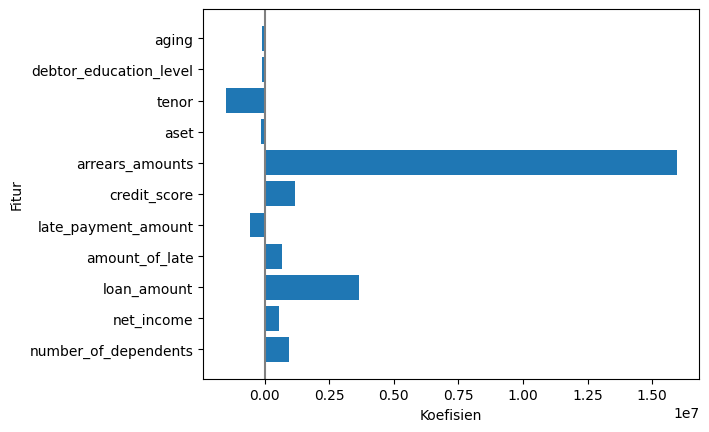

In [14]:
# Akses koefisien
coefficients = model.coef_.ravel()

# Visualisasikan koefisien
plt.barh(X_train.columns, coefficients)
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color=".5")
plt.show()

### Experiment of Amount of Late

In [15]:
X_train_experiment = X_train["amount_of_late"]
X_test_experiment = X_test["amount_of_late"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

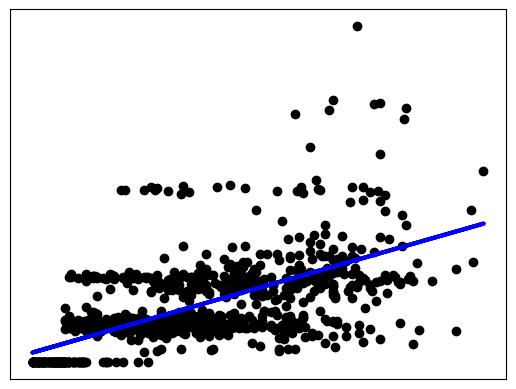

In [16]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [17]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 191942936969251.78
      Mean Absolute Error : 9470162.28
      Mean Absolute Percentage Error : 4285342304850689392640.00
      Root Mean Squared Error : 4285342304850689392640.00
      R_Squared : 0.35
      


### Experiment of net_income

In [18]:
X_train_experiment = X_train["net_income"]
X_test_experiment = X_test["net_income"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

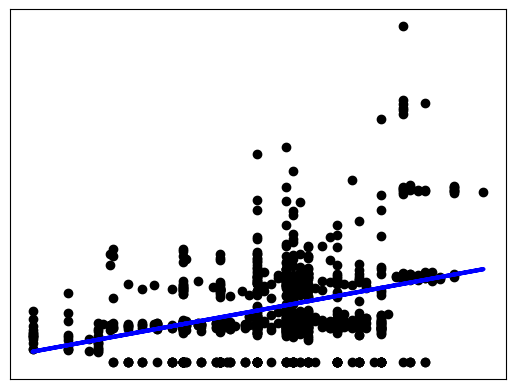

In [19]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 248662765218551.09
      Mean Absolute Error : 11084688.79
      Mean Absolute Percentage Error : 13523463961396130086912.00
      Root Mean Squared Error : 13523463961396130086912.00
      R_Squared : 0.16
      


### Experiment of Loan Amounts

In [21]:
X_train_experiment = X_train["loan_amount"]
X_test_experiment = X_test["loan_amount"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

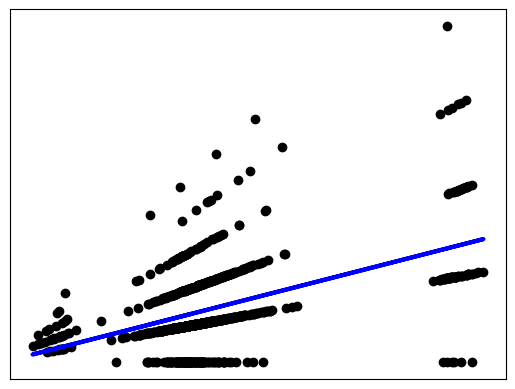

In [22]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 216513404724000.72
      Mean Absolute Error : 11048721.81
      Mean Absolute Percentage Error : 13614054420589299367936.00
      Root Mean Squared Error : 13614054420589299367936.00
      R_Squared : 0.27
      


### Experiment of Arrears Amount

In [24]:
X_train_experiment = X_train["arrears_amounts"]
X_test_experiment = X_test["arrears_amounts"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

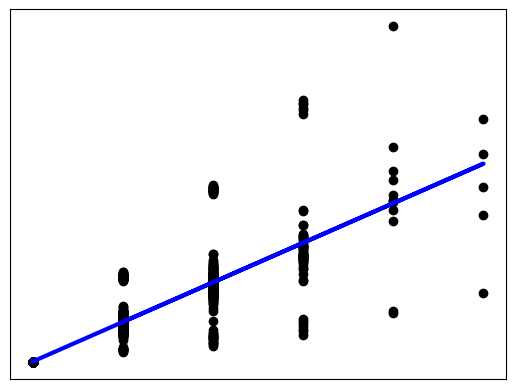

In [25]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 108627998181640.53
      Mean Absolute Error : 5064064.78
      Mean Absolute Percentage Error : 167039120991410782208.00
      Root Mean Squared Error : 167039120991410782208.00
      R_Squared : 0.63
      


### Experiment of Age

In [27]:
X_train_experiment = X_train["aging"]
X_test_experiment = X_test["aging"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

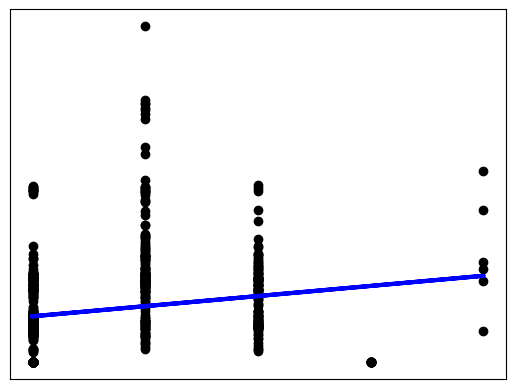

In [28]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 287425605907715.56
      Mean Absolute Error : 11692564.45
      Mean Absolute Percentage Error : 14151498041476824170496.00
      Root Mean Squared Error : 14151498041476824170496.00
      R_Squared : 0.03
      


### Experiment of late_payment

In [30]:
X_train_experiment = X_train["late_payment_amount"]
X_test_experiment = X_test["late_payment_amount"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

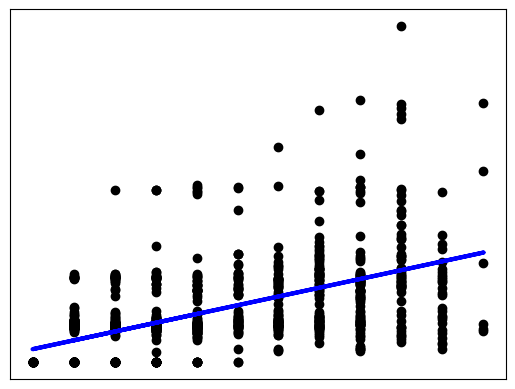

In [31]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 222202470075639.56
      Mean Absolute Error : 10349588.21
      Mean Absolute Percentage Error : 6722177914075805122560.00
      Root Mean Squared Error : 6722177914075805122560.00
      R_Squared : 0.25
      


### Experiment of Credit Score

In [33]:
X_train_experiment = X_train["credit_score"]
X_test_experiment = X_test["credit_score"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

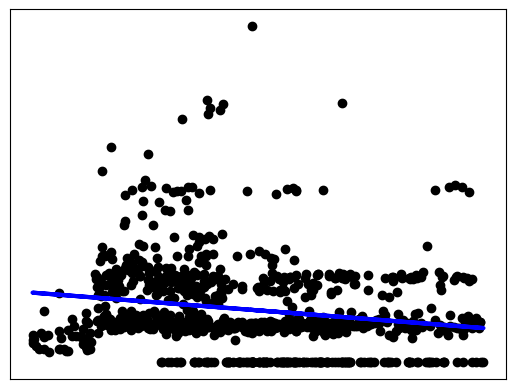

In [34]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 288506413762968.19
      Mean Absolute Error : 12347160.03
      Mean Absolute Percentage Error : 12856680050272573063168.00
      Root Mean Squared Error : 12856680050272573063168.00
      R_Squared : 0.03
      


### Lasso

In [36]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

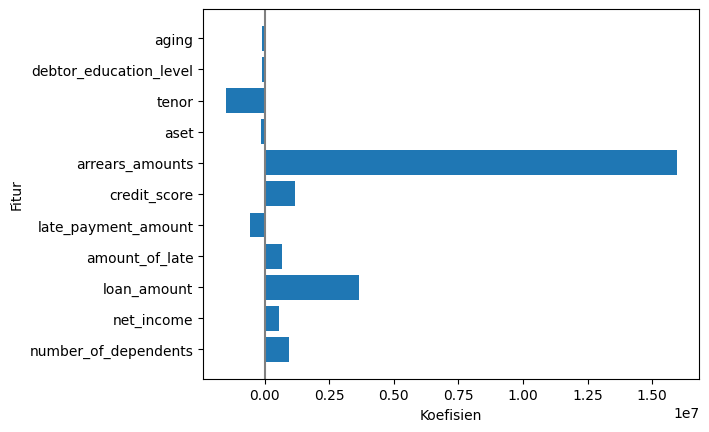

In [37]:
# Akses koefisien
coefficients = lasso.coef_.ravel()

# Visualisasikan koefisien
plt.barh(X_train.columns, coefficients)
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color=".5")
plt.show()

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 288506413762968.19
      Mean Absolute Error : 12347160.03
      Mean Absolute Percentage Error : 12856680050272573063168.00
      Root Mean Squared Error : 12856680050272573063168.00
      R_Squared : 0.03
      


In [39]:
y.describe()

count    5.000000e+03
mean     2.134012e+07
std      1.821149e+07
min      0.000000e+00
25%      1.358333e+07
50%      1.562500e+07
75%      3.041667e+07
max      1.785417e+08
Name: loss_reverse, dtype: float64

In [40]:
# Menentukan grid hyperparameter yang akan dijelajahi
param_grid = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],  # Nilai alpha yang berbeda

}

# Inisiasi GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X, y)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.062e+16, tolerance: 1.318e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.284e+16, tolerance: 1.343e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.392e+16, tolerance: 1.317e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.350e+16, tolerance: 1.322e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [41]:
grid_search.best_score_

0.9033623532082251

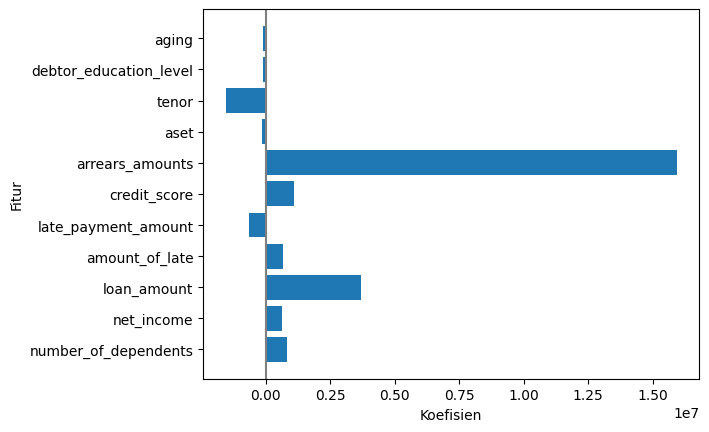

In [42]:
lasso = grid_search.best_estimator_
y_pred = lasso.predict(X_test)
# Akses koefisien
coefficients = lasso.coef_.ravel()

# Visualisasikan koefisien
plt.barh(X_train.columns, coefficients)
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color=".5")
plt.show()

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 25725773702881.78
      Mean Absolute Error : 2635956.91
      Mean Absolute Percentage Error : 2173778129491989364736.00
      Root Mean Squared Error : 2173778129491989364736.00
      R_Squared : 0.91
      


In [44]:
import pickle

pickle.dump(lasso, open("lasso.pkl", "wb"))

In [45]:
y.describe()

count    5.000000e+03
mean     2.134012e+07
std      1.821149e+07
min      0.000000e+00
25%      1.358333e+07
50%      1.562500e+07
75%      3.041667e+07
max      1.785417e+08
Name: loss_reverse, dtype: float64

In [46]:
import joblib
load_model = joblib.load('lasso.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
result

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


11667357.733785221

In [47]:
y_test.iloc[-1]

12041666.666666666